<a href="https://colab.research.google.com/github/Titophilip/DataCamp/blob/main/boat_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
boat_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boat_data.csv')
boat_data.head()

,Currency,Amount,Euro Equivalent,Boat Type,Manufacturer,Type,Conditon,Fuel Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF,14900,14900.0,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",Used boat,Unleaded,1992,7.70,2.46,Plastic,Switzerland,3263
1,CHF,35000,35000.0,Hardtop,Princess power boats,"Used boat,Diesel",Used boat,Diesel,1979,11.12,3.88,GRP,Switzerland,2432
2,CHF,125900,125900.0,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",Used boat,Diesel,2002,12.35,3.48,GRP,Switzerland,2261
3,EUR,949000,1100840.0,Hardtop,Pershing power boats,"Used boat,Diesel",Used boat,Diesel,2009,20.30,5.20,GRP,Neustadt,2154
4,CHF,19900,19900.0,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",Used boat,Unleaded,1993,6.14,2.34,Plastic,Switzerland,2026


First, we quickly explore the data.

In [3]:
boat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Currency                     9888 non-null   object 
 1   Amount                       9888 non-null   int64  
 2   Euro Equivalent              9888 non-null   float64
 3   Boat Type                    9888 non-null   object 
 4   Manufacturer                 8550 non-null   object 
 5   Type                         9882 non-null   object 
 6   Conditon                     9802 non-null   object 
 7   Fuel Type                    7676 non-null   object 
 8   Year Built                   9888 non-null   int64  
 9   Length                       9879 non-null   float64
 10  Width                        9832 non-null   float64
 11  Material                     8139 non-null   object 
 12  Location                     9851 non-null   object 
 13  Number of views la

In [4]:
boat_data.describe()

,Amount,Euro Equivalent,Year Built,Length,Width,Number of views last 7 days
count,9.888000e+03,9.888000e+03,9888.000000,9879.000000,9832.000000,9888.000000
mean,3.201373e+05,3.422782e+05,1893.192860,11.570017,3.520124,149.160801
std,1.007482e+06,1.103839e+06,460.201582,6.002820,1.220534,151.819752
min,3.300000e+03,3.224000e+03,0.000000,1.040000,0.010000,13.000000
25%,4.400000e+04,4.860400e+04,1996.000000,7.470000,2.540000,70.000000
50%,9.500000e+04,1.044000e+05,2007.000000,10.280000,3.330000,108.000000
75%,2.550000e+05,2.791068e+05,2017.000000,13.930000,4.250000,172.000000
max,3.100000e+07,3.596000e+07,2021.000000,100.000000,25.160000,3263.000000


In [21]:
sns.set_theme()

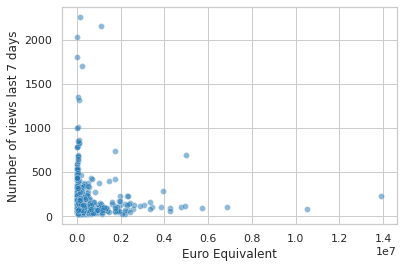

In [50]:
np.random.seed(43)

sample = boat_data.sample(n=1000)

sns.scatterplot(x='Euro Equivalent', y='Number of views last 7 days', data=sample, alpha=0.5)
plt.show()

In [51]:
correlation = boat_data['Euro Equivalent'].corr(boat_data['Number of views last 7 days'])
print(correlation)

-0.009830135983368788


In [52]:
sample['sqrt Euro Equivalent'] = np.sqrt(sample['Euro Equivalent'])
sample['sqrt Number of views'] = np.sqrt(sample['Number of views last 7 days'])

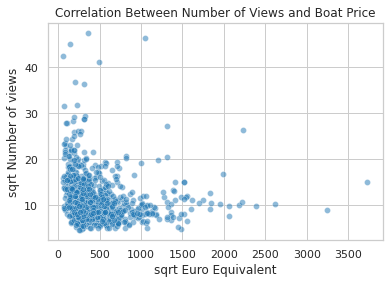

In [53]:
sns.scatterplot(data= sample, x='sqrt Euro Equivalent', y='sqrt Number of views', alpha=0.5)
plt.title('Correlation Between Number of Views and Boat Price')
plt.show()

In [54]:
correlation_sqrt = sample['sqrt Euro Equivalent'].corr(sample['sqrt Number of views'])
print(correlation_sqrt)

-0.15600932223496428


Let's say boats that are viewed, at least, 100 times on average daily are boats with high views.

So, we subset to see boats with 700 views or more in the last 7 days.

In [4]:
most_viewed = boat_data[boat_data['Number of views last 7 days'] >= 700].sort_values('Number of views last 7 days', ascending=False)
most_viewed.head()

,Currency,Amount,Euro Equivalent,Boat Type,Manufacturer,Type,Conditon,Fuel Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF,14900,14900.0,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",Used boat,Unleaded,1992,7.70,2.46,Plastic,Switzerland,3263
1,CHF,35000,35000.0,Hardtop,Princess power boats,"Used boat,Diesel",Used boat,Diesel,1979,11.12,3.88,GRP,Switzerland,2432
2,CHF,125900,125900.0,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",Used boat,Diesel,2002,12.35,3.48,GRP,Switzerland,2261
3,EUR,949000,1100840.0,Hardtop,Pershing power boats,"Used boat,Diesel",Used boat,Diesel,2009,20.30,5.20,GRP,Neustadt,2154
4,CHF,19900,19900.0,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",Used boat,Unleaded,1993,6.14,2.34,Plastic,Switzerland,2026


In [83]:
sns.set_context('notebook')

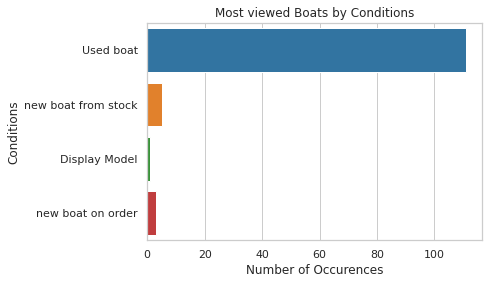

<Figure size 432x288 with 0 Axes>

In [47]:
sns.countplot(data=most_viewed, y='Conditon')
plt.title('Most viewed Boats by Conditions')
plt.xlabel('Number of Occurences')
plt.ylabel('Conditions')
plt.show()
plt.savefig('Most viewed Boats by Conditions.png')

In [69]:
fuel_type = most_viewed['Fuel Type'].value_counts()
fuel_type


Unleaded    72
Diesel      41
Name: Fuel Type, dtype: int64

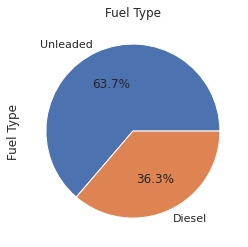

<Figure size 432x288 with 0 Axes>

In [86]:
bar = ['Unleaded', 'Diesel']
fuel_type.plot(kind='pie', labels = bar,autopct='%1.1f%%')
plt.title('Fuel Type')
plt.show()
plt.savefig('Most viewed Boats by Fuel Type.png')

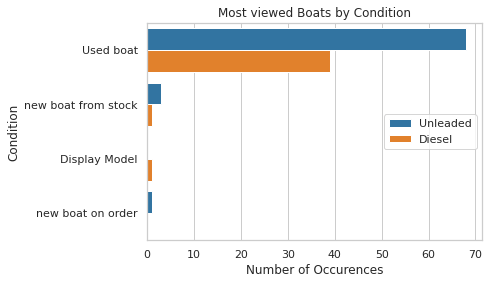

<Figure size 432x288 with 0 Axes>

In [55]:
sns.countplot(data=most_viewed, y='Conditon', hue='Fuel Type')
plt.title('Most viewed Boats by Condition')
plt.xlabel('Number of Occurences')
plt.ylabel('Condition')
plt.legend(loc='right')
plt.show()
plt.savefig('Most viewed Boats by Condition and Fuel Type.png')

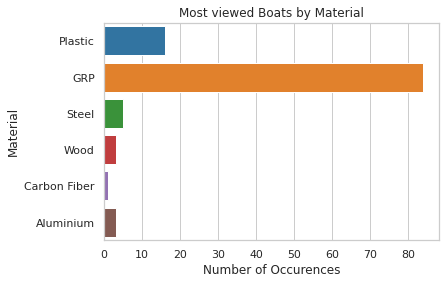

<Figure size 432x288 with 0 Axes>

In [56]:
sns.countplot(data=most_viewed, y='Material')
plt.title('Most viewed Boats by Material')
plt.xlabel('Number of Occurences')
plt.ylabel('Material')
plt.show()
plt.savefig('Most viewed Boats by Material.png')

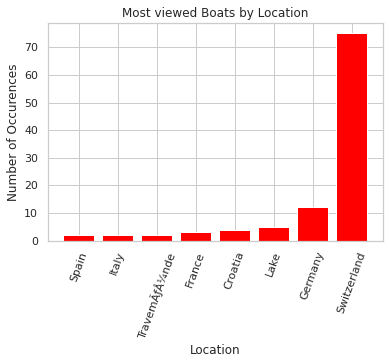

<Figure size 432x288 with 0 Axes>

In [57]:
most_viewed_locations = most_viewed.Location.value_counts().to_frame()
most_viewed_locations.reset_index(inplace=True)
most_viewed_locations.columns = ['Location', 'Number of Occurences']
most_viewed_locations = most_viewed_locations[most_viewed_locations['Number of Occurences'] > 1].sort_values('Number of Occurences', ascending=True)
plt.bar(x=most_viewed_locations['Location'], height=most_viewed_locations['Number of Occurences'], color='red')
plt.title('Most viewed Boats by Location')
plt.ylabel('Number of Occurences')
plt.xticks(rotation=70)
plt.xlabel('Location')
plt.show()
plt.savefig('Most viewed Boats by Location.png')

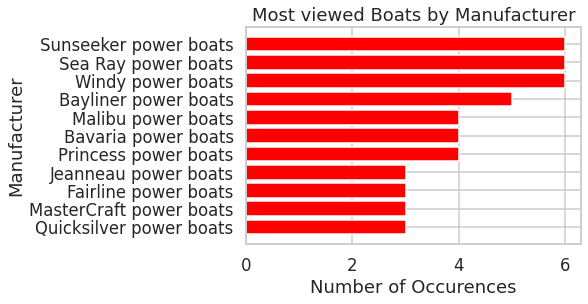

<Figure size 432x288 with 0 Axes>

In [44]:
sns.set_style('whitegrid')
most_viewed_manufacturers = most_viewed.Manufacturer.value_counts().to_frame()
most_viewed_manufacturers.reset_index(inplace=True)
most_viewed_manufacturers.columns = ['Manufacturer', 'Number of Occurences']
most_viewed_manufacturers = most_viewed_manufacturers[most_viewed_manufacturers['Number of Occurences'] > 2].sort_values('Number of Occurences', ascending=True)
plt.barh(y=most_viewed_manufacturers['Manufacturer'], width=most_viewed_manufacturers['Number of Occurences'], color='red')
plt.title('Most viewed Boats by Manufacturer')
plt.xlabel('Number of Occurences')
# plt.xticks(rotation=70)
plt.ylabel('Manufacturer')
plt.show()
plt.savefig('Most viewed Boats by Manufacturer.png')

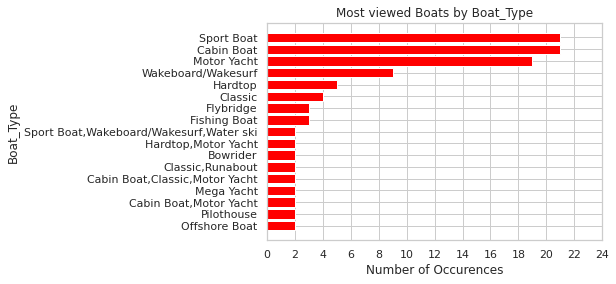

<Figure size 432x288 with 0 Axes>

In [46]:
sns.set_context('notebook')
most_viewed_Boat_Types = most_viewed['Boat Type'].value_counts().to_frame()
most_viewed_Boat_Types.reset_index(inplace=True)
most_viewed_Boat_Types.columns = ['Boat Type', 'Number of Occurences']
most_viewed_Boat_Types = most_viewed_Boat_Types[most_viewed_Boat_Types['Number of Occurences'] > 1].sort_values('Number of Occurences', ascending=True)
plt.barh(y=most_viewed_Boat_Types['Boat Type'], width=most_viewed_Boat_Types['Number of Occurences'], color='red')
plt.title('Most viewed Boats by Boat_Type')
plt.xlabel('Number of Occurences')
plt.xticks(np.arange(0, 26, 2))
plt.ylabel('Boat_Type')
plt.show()
plt.savefig('Most viewed Boats by Type.png')

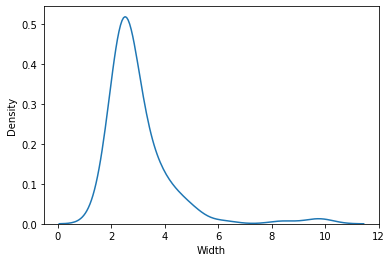

In [31]:
sns.kdeplot(data=most_viewed, x='Width')
plt.show()